# 📓 Assignment 1: k-Nearest Neighbors (k-NN) Prediction

## Problem Statement
Using k-Nearest Neighbours, predict if a student will **Pass (1)** or **Fail (0)** based on:
- $X_1$ = Hours Studied
- $X_2$ = Sleep Hours

A new student studied **4 hours** and slept **6 hours**. We want to predict whether they **Pass** or **Fail** using **KNN with k = 3**.

## Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## Set up the training data

In [4]:
data = {
    'Student': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Hours_Studied': [1.0, 2.0, 3.0, 4.5, 5.0, 5.5, 6.0, 7.0, 8.0, 9.0],
    'Sleep_Hours': [5.0, 5.5, 6.0, 5.0, 6.5, 7.0, 6.0, 7.0, 6.0, 7.5],
    'Pass_Fail': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

print("✅ Training data imported successfully!")

✅ Training data imported successfully!


## New Student data

In [5]:
new_student = [4.0, 6.0]  # [Hours_Studied, Sleep_Hours]

print("Training Data:")
print(df)

Training Data:
   Student  Hours_Studied  Sleep_Hours  Pass_Fail
0        1            1.0          5.0          0
1        2            2.0          5.5          0
2        3            3.0          6.0          0
3        4            4.5          5.0          0
4        5            5.0          6.5          1
5        6            5.5          7.0          1
6        7            6.0          6.0          1
7        8            7.0          7.0          1
8        9            8.0          6.0          1
9       10            9.0          7.5          1


# 1. Plot all data points using a scatter plot

## Create the scatter plot

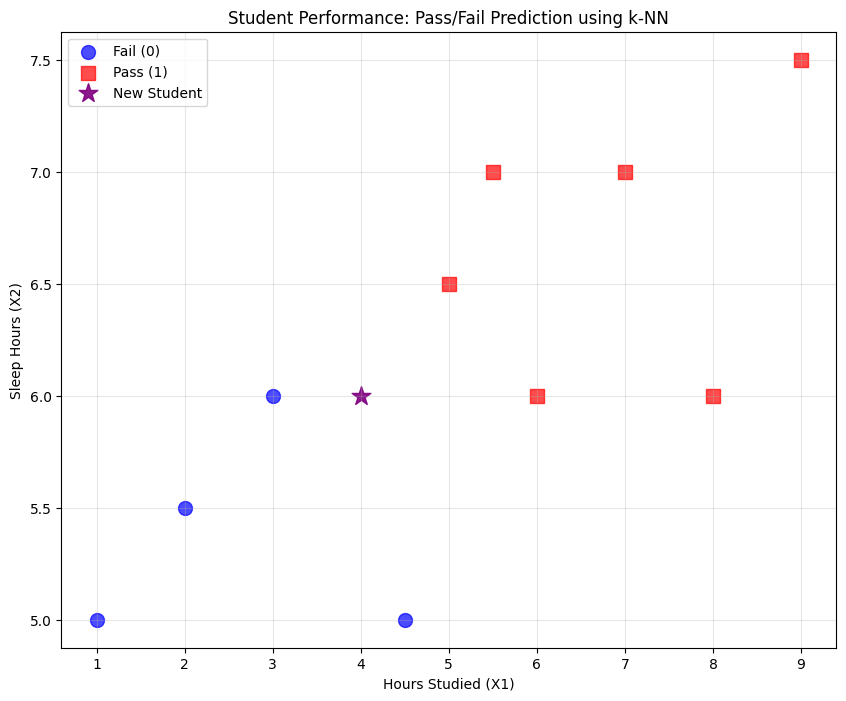

In [6]:
plt.figure(figsize=(10, 8))

# Plot failed students (0) - circles
failed = df[df['Pass_Fail'] == 0]
plt.scatter(failed['Hours_Studied'], failed['Sleep_Hours'],
           marker='o', s=100, c='blue', label='Fail (0)', alpha=0.7)

# Plot passed students (1) - squares
passed = df[df['Pass_Fail'] == 1]
plt.scatter(passed['Hours_Studied'], passed['Sleep_Hours'],
           marker='s', s=100, c='red', label='Pass (1)', alpha=0.7)

# Plot the new student - star
plt.scatter(new_student[0], new_student[1],
           marker='*', s=200, c='purple', label='New Student', alpha=0.9)

plt.xlabel('Hours Studied (X1)')
plt.ylabel('Sleep Hours (X2)')
plt.title('Student Performance: Pass/Fail Prediction using k-NN')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# 2. Compute Euclidean Distances

We compute the Euclidean distance using the formula:
$$d = \sqrt{(X_1 - 4)^2 + (X_2 - 6)^2}$$

## Calculate Euclidean distances

In [7]:
def euclidean_distance(point1, point2):
    return sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

## Add distances to dataframe

In [8]:
# Solution for distances to dataframe
distances = []
for i in range(len(df)):
    student_point = [df.iloc[i]['Hours_Studied'], df.iloc[i]['Sleep_Hours']]
    dist = euclidean_distance(student_point, new_student)
    distances.append(dist)

df['Euclidean_Distance'] = distances

print("Data with Euclidean Distances:")
print(df.round(3))

Data with Euclidean Distances:
   Student  Hours_Studied  Sleep_Hours  Pass_Fail  Euclidean_Distance
0        1            1.0          5.0          0               3.162
1        2            2.0          5.5          0               2.062
2        3            3.0          6.0          0               1.000
3        4            4.5          5.0          0               1.118
4        5            5.0          6.5          1               1.118
5        6            5.5          7.0          1               1.803
6        7            6.0          6.0          1               2.000
7        8            7.0          7.0          1               3.162
8        9            8.0          6.0          1               4.000
9       10            9.0          7.5          1               5.220


# 3. Find the 3 Nearest Neighbors

## Sort by distance and get 3 nearest neighbors

In [9]:
nearest_neighbors = df.nsmallest(3, 'Euclidean_Distance')

print("3 Nearest Neighbors:")
print(nearest_neighbors.round(3))

3 Nearest Neighbors:
   Student  Hours_Studied  Sleep_Hours  Pass_Fail  Euclidean_Distance
2        3            3.0          6.0          0               1.000
3        4            4.5          5.0          0               1.118
4        5            5.0          6.5          1               1.118


# 4. Majority Vote and Prediction

In [10]:
# Count the votes
pass_count = nearest_neighbors[nearest_neighbors['Pass_Fail'] == 1].shape[0]
fail_count = nearest_neighbors[nearest_neighbors['Pass_Fail'] == 0].shape[0]

print(f"Votes among 3 nearest neighbors:")
print(f"Pass (1): {pass_count}")
print(f"Fail (0): {fail_count}")

# Make prediction
if pass_count > fail_count:
    prediction = "PASS (1)"
else:
    prediction = "FAIL (0)"

print(f"\nPrediction: A new student who studied 4 hours and slept 6 hours will {prediction} the exam.")

Votes among 3 nearest neighbors:
Pass (1): 1
Fail (0): 2

Prediction: A new student who studied 4 hours and slept 6 hours will FAIL (0) the exam.


# 5. Additional Analysis: What if k = 5?

In [11]:
# Find 5 nearest neighbors
nearest_neighbors_k5 = df.nsmallest(5, 'Euclidean_Distance')

# Count the votes for k=5
pass_count_k5 = nearest_neighbors_k5[nearest_neighbors_k5['Pass_Fail'] == 1].shape[0]
fail_count_k5 = nearest_neighbors_k5[nearest_neighbors_k5['Pass_Fail'] == 0].shape[0]

print("5 Nearest Neighbors:")
print(nearest_neighbors_k5.round(3))

print(f"\nVotes among 5 nearest neighbors:")
print(f"Pass (1): {pass_count_k5}")
print(f"Fail (0): {fail_count_k5}")

# Make prediction for k=5
if pass_count_k5 > fail_count_k5:
    prediction_k5 = "PASS (1)"
else:
    prediction_k5 = "FAIL (0)"

print(f"\nPrediction with k=5: A new student who studied 4 hours and slept 6 hours will {prediction_k5} the exam.")

5 Nearest Neighbors:
   Student  Hours_Studied  Sleep_Hours  Pass_Fail  Euclidean_Distance
2        3            3.0          6.0          0               1.000
3        4            4.5          5.0          0               1.118
4        5            5.0          6.5          1               1.118
5        6            5.5          7.0          1               1.803
6        7            6.0          6.0          1               2.000

Votes among 5 nearest neighbors:
Pass (1): 3
Fail (0): 2

Prediction with k=5: A new student who studied 4 hours and slept 6 hours will PASS (1) the exam.


# Complete Results Table

In [12]:
print("COMPLETE RESULTS TABLE:")
print("=" * 85)
print(f"{'Student':<8} {'Hours Studied':<15} {'Sleep Hours':<13} {'Pass/Fail':<10} {'Euclidean Distance':<18}")
print("-" * 85)

for i in range(len(df)):
    student = df.iloc[i]
    is_nearest = "★" if student.name in nearest_neighbors.index else " "
    print(f"{student['Student']:<8} {student['Hours_Studied']:<15} {student['Sleep_Hours']:<13} {student['Pass_Fail']:<10} {student['Euclidean_Distance']:<18.3f} {is_nearest}")

print("-" * 85)
print(f"★ = One of the 3 nearest neighbors")

COMPLETE RESULTS TABLE:
Student  Hours Studied   Sleep Hours   Pass/Fail  Euclidean Distance
-------------------------------------------------------------------------------------
1.0      1.0             5.0           0.0        3.162               
2.0      2.0             5.5           0.0        2.062               
3.0      3.0             6.0           0.0        1.000              ★
4.0      4.5             5.0           0.0        1.118              ★
5.0      5.0             6.5           1.0        1.118              ★
6.0      5.5             7.0           1.0        1.803               
7.0      6.0             6.0           1.0        2.000               
8.0      7.0             7.0           1.0        3.162               
9.0      8.0             6.0           1.0        4.000               
10.0     9.0             7.5           1.0        5.220               
-------------------------------------------------------------------------------------
★ = One of the 3 nearest 

# Discussion Questions

**1. What was your final prediction?**

Based on k-NN with k=3, the prediction is that the new student will **FAIL (0)** the exam.

**2. How would the prediction change if we used k = 5 instead of k = 3?**

With k=5, the prediction changes to **PASS (1)**. This demonstrates how the choice of k can significantly impact the prediction in k-NN algorithm.

## Summary

This implementation follows the k-NN algorithm as demonstrated in the reference PDF:
1. Calculate Euclidean distances between the new point and all training points
2. Select k nearest neighbors
3. Use majority voting for classification
4. The choice of k parameter affects the prediction outcome

# Final verification

In [13]:
print("\n" + "="*50)
print("FINAL VERIFICATION")
print("="*50)

print(f"New Student: Hours Studied = {new_student[0]}, Sleep Hours = {new_student[1]}")
print(f"3 Nearest Neighbors: Students {list(nearest_neighbors['Student'].values)}")
print(f"Majority Vote: {pass_count} Pass vs {fail_count} Fail")
print(f"Prediction with k=3: {prediction}")
print(f"Prediction with k=5: {prediction_k5}")


FINAL VERIFICATION
New Student: Hours Studied = 4.0, Sleep Hours = 6.0
3 Nearest Neighbors: Students [np.int64(3), np.int64(4), np.int64(5)]
Majority Vote: 1 Pass vs 2 Fail
Prediction with k=3: FAIL (0)
Prediction with k=5: PASS (1)
